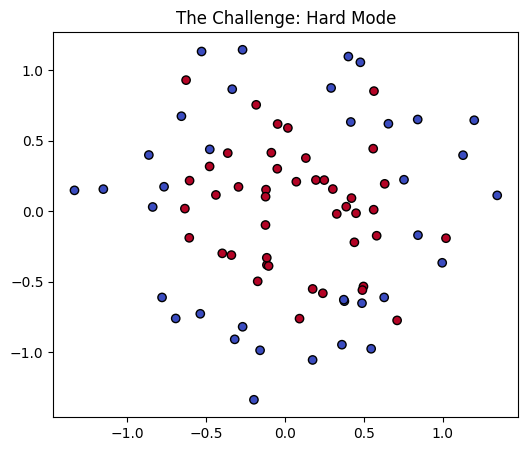

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# 1. Create a very hard dataset
# n_samples=100 (Very little data -> High risk of overfitting)
# noise=0.2 (Messy data)
# factor=0.5 (Inner circle is bigger, so it's closer to the outer circle)
X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize
plt.figure(figsize=(6, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title("The Challenge: Hard Mode")
plt.show()

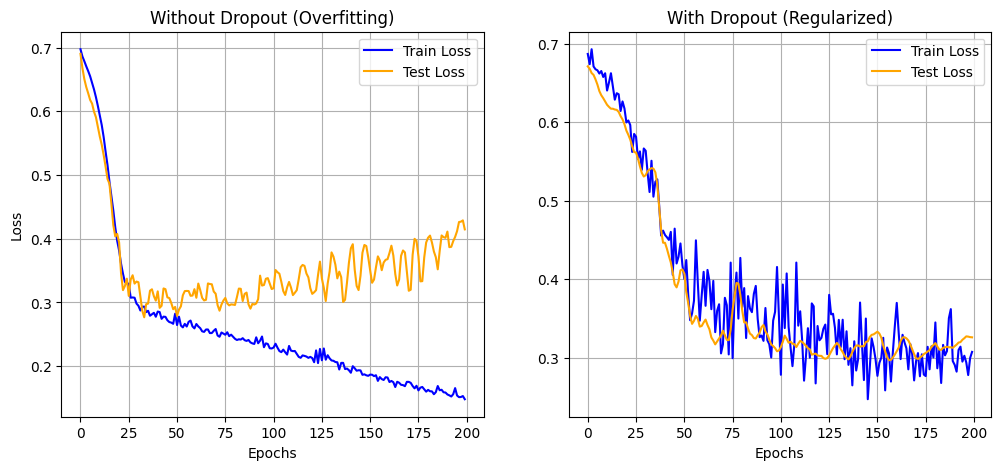

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# --- Model 1: The Bad Model (Overfitting) ---
model_bad = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(2,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model_bad.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_bad = model_bad.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)

# --- Model 2: The Good Model (With Dropout) ---
model_dropout = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(2,)),
    layers.Dropout(0.5),  # Randomly drop 50% neurons
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)

# --- Plot the Comparison ---
plt.figure(figsize=(12, 5))

# Plot Bad Model
plt.subplot(1, 2, 1)
plt.plot(history_bad.history['loss'], label='Train Loss', color='blue')
plt.plot(history_bad.history['val_loss'], label='Test Loss', color='orange')
plt.title('Without Dropout (Overfitting)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)

# Plot Good Model
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['loss'], label='Train Loss', color='blue')
plt.plot(history_dropout.history['val_loss'], label='Test Loss', color='orange')
plt.title('With Dropout (Regularized)')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)

plt.show()